# Importing modules and dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
#mapping maligent(M) as 1 and Being(B) as 0
df.diagnosis.replace(['M', 'B'], [1, 0], inplace=True)

In [4]:
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

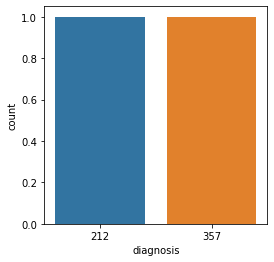

In [5]:
plt.figure(figsize=(4,4))
sns.countplot(df['diagnosis'].value_counts())
plt.show

In [6]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [7]:
#droppinng un-necessary columns
df.drop(['Unnamed: 32','id'],axis=1,inplace=True)

In [8]:
#removing outliers
import scipy.stats as stats
z = np.abs(stats.zscore(df))
print(df.shape)
df = df[(z < 3).all(axis=1)]
print(df.shape)
df.head()

(569, 31)
(495, 31)


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.2,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,...,15.47,23.75,103.4,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.1127,0.07400,0.1794,...,22.88,27.66,153.2,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368


In [9]:
#splitting dependent and independent features
X=df.drop('diagnosis',axis=1)
y=df.diagnosis

# Finding important features

In [10]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

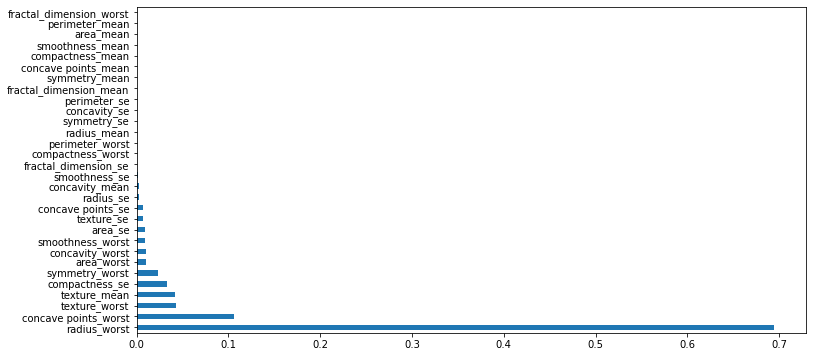

In [11]:
#finding the important features DecisionTreeClassifier.
selection = DecisionTreeClassifier()
selection.fit(X, y)

plt.figure(figsize = (12,6))
feature_importance = pd.Series(selection.feature_importances_, index=X.columns)
feature_importance.nlargest(50).plot(kind='barh')
plt.show()

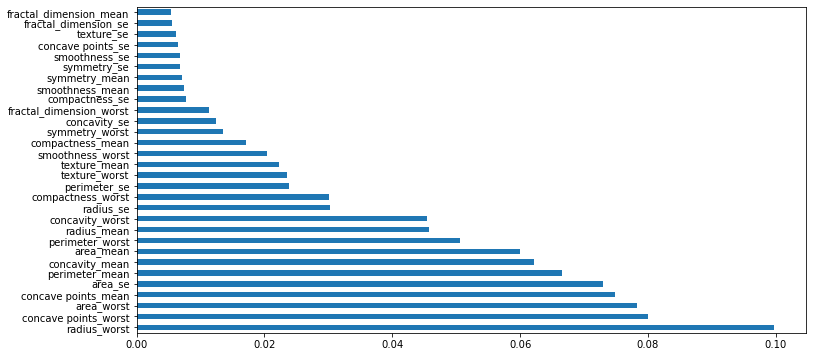

In [12]:
#finding the important features R
selection = ExtraTreesClassifier()
selection.fit(X, y)

plt.figure(figsize = (12,6))
feature_importance = pd.Series(selection.feature_importances_, index=X.columns)
feature_importance.nlargest(50).plot(kind='barh')
plt.show()

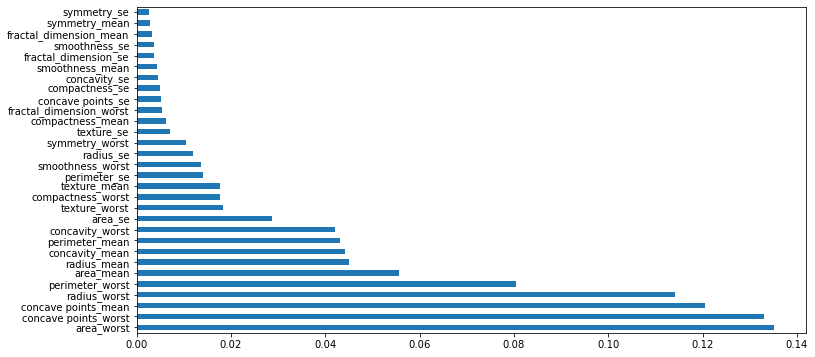

In [13]:
#finding the important features DecisionTreeClassifier.
selection = RandomForestClassifier()
selection.fit(X, y)

plt.figure(figsize = (12,6))
feature_importance = pd.Series(selection.feature_importances_, index=X.columns)
feature_importance.nlargest(50).plot(kind='barh')
plt.show()

In [14]:
#converting categorical to numerical features
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)

In [15]:
#scaling features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [16]:
from sklearn.neighbors import NeighborhoodComponentsAnalysis
nca = NeighborhoodComponentsAnalysis(random_state=1)
nca.fit(X, y)
X = nca.transform(X)

# Model Training

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=30)

In [19]:
# model_dict = {'LogisticRegression': LogisticRegression(penalty='l1', solver='saga', C=2, multi_class='multinomial', n_jobs=-1, random_state=1)
#              , 'ExtraTreesClassifier': ExtraTreesClassifier(n_estimators=200, max_depth=3, min_samples_leaf=.06, n_jobs=-1, random_state=1)
#               , 'RandomForestClassifier': RandomForestClassifier(n_estimators=20, max_depth=2, min_samples_leaf=.1, random_state=1, n_jobs=-1)
#              }
# estimator_dict = {}
# importance_fatures_sorted_all = pd.DataFrame()
# for model_name, model in model_dict.items():
#     print('='*10, model_name, '='*10)
#     model.fit(X_train, y_train)
#     print('Accuracy in training:', accuracy_score(model.predict(X_train), y_train))
#     print('Accuracy in valid:', accuracy_score(model.predict(X_test), y_test))
#     importance_values = np.absolute(model.coef_) if model_name == 'LogisticRegression' else model.feature_importances_
#     importance_fatures_sorted = pd.DataFrame(importance_values.reshape([-1, len(X.columns)]), columns=X.columns).mean(axis=0).sort_values(ascending=False).to_frame()
#     importance_fatures_sorted.rename(columns={0: 'feature_importance'}, inplace=True)
#     importance_fatures_sorted['ranking']= importance_fatures_sorted['feature_importance'].rank(ascending=False)
#     importance_fatures_sorted['model'] = model_name
#     print('Show top 10 important features:')
#     display(importance_fatures_sorted.drop('model', axis=1).head(10))
#     importance_fatures_sorted_all = importance_fatures_sorted_all.append(importance_fatures_sorted)
#     estimator_dict[model_name] = model

# plt.title('Feature importance ranked by number of features by model')
# sns.lineplot(data=importance_fatures_sorted_all, x='ranking', y='feature_importance', hue='model')
# plt.xlabel("Number of features selected")

In [20]:
dt=DecisionTreeClassifier()
dt.fit(X_train, y_train)
print(dt.score(X_train,y_train))
prediction_dt = dt.predict(X_test)
score=accuracy_score(y_test, prediction_dt)
print(score)

1.0
0.9634146341463414


In [21]:
lr=LogisticRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train,y_train))
prediction_lr = lr.predict(X_test)
score=accuracy_score(y_test, prediction_lr)
print(score)

0.9909365558912386
0.975609756097561


In [22]:
svm=SVC()
svm.fit(X_train, y_train)
print(svm.score(X_train,y_train))
prediction_svc = svm.predict(X_test)
score=accuracy_score(y_test, prediction_svc)
print(score)

0.9909365558912386
0.9695121951219512


In [23]:
etc = ExtraTreesClassifier(criterion='gini', min_samples_split=30, random_state=1,n_estimators=12)
etc.fit(X_train, y_train)
print(etc.score(X_train,y_train))
prediction_etc = etc.predict(X_test)
score=accuracy_score(y_test, prediction_etc)
print(score)

0.9939577039274925
0.9573170731707317


In [24]:
rf = ExtraTreesClassifier(criterion='gini', min_samples_split=30, random_state=1)
rf.fit(X_train, y_train)
print(rf.score(X_train,y_train))
prediction_rf = rf.predict(X_test)
score=accuracy_score(y_test, prediction_rf)
print(score)

0.9909365558912386
0.9634146341463414


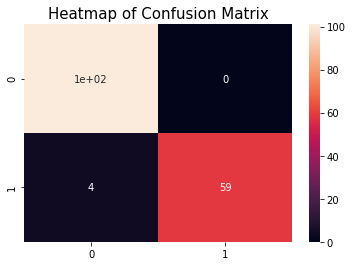

In [25]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, prediction_lr)
plt.title('Heatmap of Confusion Matrix', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

In [26]:
# Cross validation
from sklearn.model_selection import cross_val_score
cross_validation = cross_val_score(estimator = lr, X = X_train,y = y_train, cv = 10)
print("Cross validation accuracy of model = ", cross_validation)
print("\nCross validation mean accuracy of model = ", cross_validation.mean())

Cross validation accuracy of model =  [1.         0.96969697 1.         1.         1.         0.93939394
 0.96969697 1.         1.         0.96969697]

Cross validation mean accuracy of model =  0.9848484848484848


In [27]:
import pickle
pickle.dump(lr, open('breast_cancer_detector.pickle', 'wb'))
# load model
breast_cancer_detector_model = pickle.load(open('breast_cancer_detector.pickle', 'rb'))
# predict the output
y_pred = breast_cancer_detector_model.predict(X_test)
# confusion matrix
print('Confusion matrix of model: \n',confusion_matrix(y_test, y_pred),'\n')
# show the accuracy
print('Accuracy of  model = ',accuracy_score(y_test, y_pred))

Confusion matrix of model: 
 [[101   0]
 [  4  59]] 

Accuracy of  model =  0.975609756097561
